## Assignment 1
### Name: Ritesah M
### Roll Number: 21CS30042

In [1]:
# import all the necessary libraries here
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('../../dataset/linear-regression.csv')
print(df.shape) 

(1599, 12)


In [3]:
df.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [4]:
def print_max(dataframe):
    for column in dataframe.columns:
        print(f"Max for {column}: {dataframe[column].max()}")

def print_min(dataframe):
    for column in dataframe.columns:
        print(f"Min for {column}: {dataframe[column].min()}")

In [5]:
X=df.drop("quality",axis=1)
y=df["quality"]
print(X.shape)
print(y.shape)

(1599, 11)
(1599,)


In [6]:
print(print_max(df))
print(print_min(df))

Max for fixed acidity: 15.9
Max for volatile acidity: 1.58
Max for citric acid: 1.0
Max for residual sugar: 15.5
Max for chlorides: 0.611
Max for free sulfur dioxide: 72.0
Max for total sulfur dioxide: 289.0
Max for density: 1.00369
Max for pH: 4.01
Max for sulphates: 2.0
Max for alcohol: 14.9
Max for quality: 8
None
Min for fixed acidity: 4.6
Min for volatile acidity: 0.12
Min for citric acid: 0.0
Min for residual sugar: 0.9
Min for chlorides: 0.012
Min for free sulfur dioxide: 1.0
Min for total sulfur dioxide: 6.0
Min for density: 0.99007
Min for pH: 2.74
Min for sulphates: 0.33
Min for alcohol: 8.4
Min for quality: 3
None


In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
cols_to_scale=[]
for column in df.columns:
    if column != "quality":
        cols_to_scale.append(column)
print(cols_to_scale)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42)

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(799, 11)
(799,)
(480, 11)
(480,)
(320, 11)
(320,)


In [11]:
X_train=X_train.to_numpy()
ones_column_train= np.ones((X_train.shape[0],1))
y_train=y_train.to_numpy(dtype="float64")
X_train=np.hstack((ones_column_train,X_train))

X_val=X_val.to_numpy()
ones_column_val= np.ones((X_val.shape[0],1))
y_val=y_val.to_numpy(dtype="float64")
X_val=np.hstack((ones_column_val,X_val))

X_test=X_test.to_numpy()
ones_column_test= np.ones((X_test.shape[0],1))
y_test=y_test.to_numpy(dtype="float64")
X_test=np.hstack((ones_column_test,X_test))

# Analytical Solution

In [12]:
df.columns.shape

(12,)

In [13]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [14]:
X_train.shape

(799, 12)

In [15]:
print(X_train.shape)
print(y_train)

(799, 12)
[5. 5. 7. 6. 6. 5. 6. 5. 6. 5. 5. 5. 6. 5. 7. 7. 5. 5. 5. 5. 5. 5. 5. 6.
 6. 3. 5. 5. 6. 6. 5. 6. 7. 5. 5. 7. 6. 6. 6. 6. 7. 6. 6. 5. 7. 7. 7. 5.
 5. 6. 5. 5. 6. 5. 6. 6. 6. 8. 6. 5. 6. 5. 5. 6. 6. 6. 5. 4. 6. 6. 6. 6.
 6. 6. 5. 5. 8. 4. 5. 5. 6. 6. 6. 7. 5. 5. 6. 6. 6. 6. 6. 6. 6. 5. 5. 6.
 7. 6. 4. 5. 5. 5. 5. 5. 6. 6. 5. 4. 7. 6. 5. 7. 7. 5. 5. 5. 6. 6. 5. 6.
 5. 5. 6. 6. 6. 6. 5. 5. 7. 5. 6. 6. 5. 6. 5. 6. 5. 7. 5. 6. 5. 6. 5. 5.
 6. 6. 5. 5. 6. 6. 7. 6. 5. 5. 7. 6. 5. 5. 6. 7. 6. 6. 6. 7. 5. 6. 7. 6.
 6. 4. 7. 5. 5. 5. 5. 6. 6. 7. 6. 6. 5. 7. 6. 6. 6. 5. 6. 5. 7. 6. 5. 6.
 8. 5. 6. 6. 6. 6. 5. 6. 6. 5. 4. 6. 6. 5. 6. 5. 7. 5. 5. 6. 7. 5. 6. 5.
 6. 5. 6. 5. 7. 5. 6. 6. 6. 7. 6. 8. 6. 5. 6. 5. 6. 4. 5. 5. 6. 7. 5. 5.
 5. 6. 6. 5. 5. 7. 7. 5. 6. 7. 7. 5. 5. 5. 7. 6. 5. 6. 5. 5. 6. 6. 5. 7.
 6. 7. 6. 6. 5. 5. 5. 5. 5. 5. 7. 7. 5. 6. 5. 6. 5. 5. 5. 4. 6. 6. 8. 6.
 6. 5. 5. 5. 5. 6. 6. 5. 5. 5. 5. 5. 5. 7. 5. 5. 5. 5. 4. 5. 6. 6. 5. 5.
 6. 6. 5. 8. 5. 5. 5. 7. 3. 5. 7. 5. 5. 6

In [16]:
Xt_train=np.transpose(X_train)
print(Xt_train)

[[ 1.    1.    1.   ...  1.    1.    1.  ]
 [ 8.6   7.8   9.8  ...  7.2   7.9   5.8 ]
 [ 0.52  0.56  0.5  ...  0.62  0.2   0.29]
 ...
 [ 3.2   3.19  3.24 ...  3.51  3.32  3.39]
 [ 0.52  0.93  0.6  ...  0.54  0.8   0.54]
 [ 9.4   9.5   9.7  ...  9.5  11.9  13.5 ]]


In [17]:
print(X_train)

[[ 1.    8.6   0.52 ...  3.2   0.52  9.4 ]
 [ 1.    7.8   0.56 ...  3.19  0.93  9.5 ]
 [ 1.    9.8   0.5  ...  3.24  0.6   9.7 ]
 ...
 [ 1.    7.2   0.62 ...  3.51  0.54  9.5 ]
 [ 1.    7.9   0.2  ...  3.32  0.8  11.9 ]
 [ 1.    5.8   0.29 ...  3.39  0.54 13.5 ]]


In [18]:
print(print_max(df))
print(print_min(df))

Max for fixed acidity: 15.9
Max for volatile acidity: 1.58
Max for citric acid: 1.0
Max for residual sugar: 15.5
Max for chlorides: 0.611
Max for free sulfur dioxide: 72.0
Max for total sulfur dioxide: 289.0
Max for density: 1.00369
Max for pH: 4.01
Max for sulphates: 2.0
Max for alcohol: 14.9
Max for quality: 8
None
Min for fixed acidity: 4.6
Min for volatile acidity: 0.12
Min for citric acid: 0.0
Min for residual sugar: 0.9
Min for chlorides: 0.012
Min for free sulfur dioxide: 1.0
Min for total sulfur dioxide: 6.0
Min for density: 0.99007
Min for pH: 2.74
Min for sulphates: 0.33
Min for alcohol: 8.4
Min for quality: 3
None


In [19]:
XtX_train=np.matmul(Xt_train,X_train)
XtX_inv_train=np.linalg.inv(XtX_train)
print(XtX_inv_train)
print(XtX_inv_train.shape)

[[ 2.11574955e+03  2.01312462e+00  1.45140448e+00  1.57813370e-01
   9.20446869e-01  3.03217932e+00 -2.62021425e-02  6.21449171e-03
  -2.15934226e+03  1.07472422e+01  2.94881790e+00 -2.00578588e+00]
 [ 2.01312462e+00  3.22026683e-03 -7.49833859e-04 -5.68095055e-03
   8.45858728e-04  1.07236325e-02 -3.95347933e-05  2.13106856e-05
  -2.08656321e+00  1.70945780e-02  2.42460001e-03 -1.89179795e-03]
 [ 1.45140448e+00 -7.49833859e-04  7.61723554e-02  4.86762273e-02
  -1.63186639e-04 -6.86330524e-02  2.10830772e-04 -7.89870899e-05
  -1.50006530e+00 -1.58534290e-04  1.42887160e-02 -5.58737921e-04]
 [ 1.57813370e-01 -5.68095055e-03  4.86762273e-02  9.98141904e-02
  -1.07083492e-03 -7.65867936e-02  2.86912962e-04 -1.31695283e-04
  -1.53067400e-01  5.94837175e-03 -1.30489321e-03 -1.81272642e-03]
 [ 9.20446869e-01  8.45858728e-04 -1.63186639e-04 -1.07083492e-03
   1.06785746e-03 -7.27346859e-05 -2.16787295e-05 -2.26233802e-07
  -9.38606202e-01  4.61728012e-03  1.73878253e-03 -9.90361198e-04]
 [ 3.

In [20]:
print(XtX_inv_train.shape)
print(Xt_train.shape)
print(y_train.shape)

(12, 12)
(12, 799)
(799,)


In [21]:
temp=np.matmul(XtX_inv_train,Xt_train)
theta=np.matmul(temp,y_train)
print(theta.shape)

(12,)


In [22]:
print(theta)

[ 1.03434328e+01  4.21803857e-03 -1.28736172e+00 -2.81156682e-01
  1.59731779e-02 -1.78832680e+00  3.08338676e-03 -3.04438457e-03
 -6.74416241e+00 -1.82876873e-01  6.77925417e-01  2.98166487e-01]


In [23]:
y_testpred= np.matmul(X_test,theta)
print(y_test,y_testpred)

[5. 6. 6. 6. 6. 4. 6. 6. 6. 7. 5. 5. 5. 5. 6. 6. 6. 5. 5. 5. 6. 6. 5. 6.
 4. 5. 6. 5. 6. 6. 7. 6. 5. 6. 6. 6. 6. 5. 5. 6. 6. 5. 7. 5. 5. 7. 5. 6.
 5. 6. 7. 5. 5. 5. 6. 5. 6. 6. 5. 5. 5. 6. 7. 6. 5. 5. 6. 7. 6. 5. 5. 6.
 5. 5. 5. 7. 6. 7. 4. 5. 7. 5. 6. 5. 5. 6. 5. 5. 5. 5. 5. 7. 5. 6. 4. 6.
 6. 5. 6. 5. 5. 4. 6. 6. 8. 7. 5. 5. 6. 5. 5. 8. 6. 7. 6. 8. 5. 3. 7. 7.
 5. 5. 5. 5. 7. 4. 6. 6. 6. 4. 5. 5. 6. 7. 7. 6. 5. 5. 4. 5. 5. 5. 6. 6.
 5. 6. 5. 6. 6. 5. 6. 6. 7. 5. 5. 5. 5. 5. 3. 5. 7. 5. 6. 5. 7. 6. 6. 5.
 6. 6. 7. 5. 5. 5. 6. 6. 6. 5. 5. 5. 8. 5. 5. 7. 6. 5. 5. 5. 6. 6. 6. 5.
 6. 6. 6. 7. 7. 6. 5. 5. 6. 6. 5. 6. 5. 5. 6. 7. 6. 6. 5. 5. 5. 5. 5. 5.
 6. 7. 6. 6. 5. 5. 5. 6. 7. 6. 5. 5. 5. 6. 7. 6. 5. 6. 5. 6. 7. 5. 5. 6.
 6. 7. 5. 5. 5. 5. 6. 6. 6. 6. 4. 7. 7. 5. 5. 6. 6. 6. 6. 5. 5. 7. 5. 5.
 6. 6. 7. 8. 5. 6. 6. 7. 5. 8. 5. 5. 6. 5. 7. 6. 5. 4. 6. 5. 5. 6. 7. 6.
 5. 6. 7. 6. 6. 5. 7. 6. 6. 5. 5. 6. 4. 6. 6. 6. 5. 5. 6. 3. 5. 5. 7. 6.
 6. 7. 7. 5. 5. 6. 5. 5.] [5.05866571 6.16780205 5.

In [24]:
def print_comparision(y_test,y_testpred):
    for i in range(y_test.shape[0]):
        print(f"Actual value:{y_test[i]}, Prediction: {y_testpred[i]}")
        print("\n")

In [25]:
def calculate_rmse(y_actual, y_pred):
    squared_errors = (y_actual - y_pred) ** 2
    mean_squared_error = np.mean(squared_errors)
    rmse = np.sqrt(mean_squared_error)
    return rmse

def calculate_r_squared(y_actual, y_pred):
    total_variance = np.sum((y_actual - np.mean(y_actual)) ** 2)
    explained_variance = np.sum((y_pred - y_actual) ** 2)
    r_squared = 1 - (explained_variance / total_variance)
    return r_squared

In [26]:
# from sklearn.metrics import mean_squared_error, r2_score
rmse= calculate_rmse(y_test,y_testpred)
r_squared=calculate_r_squared(y_test,y_testpred)
print(f"mean squared error:{rmse**2}")
print(f"rmse:{rmse}")
print(f"r_squared:{r_squared}")

mean squared error:0.4431719294227915
rmse:0.6657115962808455
r_squared:0.3967805083955571


# Gradient Descent Solution

<h5> Here I am considering theta as w just for the sake of conveneince<h5>

In [27]:
X_train

array([[ 1.  ,  8.6 ,  0.52, ...,  3.2 ,  0.52,  9.4 ],
       [ 1.  ,  7.8 ,  0.56, ...,  3.19,  0.93,  9.5 ],
       [ 1.  ,  9.8 ,  0.5 , ...,  3.24,  0.6 ,  9.7 ],
       ...,
       [ 1.  ,  7.2 ,  0.62, ...,  3.51,  0.54,  9.5 ],
       [ 1.  ,  7.9 ,  0.2 , ...,  3.32,  0.8 , 11.9 ],
       [ 1.  ,  5.8 ,  0.29, ...,  3.39,  0.54, 13.5 ]])

In [28]:
X_train.shape

(799, 12)

In [29]:
y_train.shape

(799,)

In [30]:
def mean_squared(y_train,y_pred):
    cost=0
    m= y_train.shape[0]
    for i in range(m):
        cost += (y_train[i]-y_pred[i])**2
    error = cost/(2*m)
    return error


In [31]:

def gradient_descent(X,y,X_val,y_val,w,alpha,train_losses,val_losses):
        m=X.shape[0]
        n=X.shape[1]
        pred=np.dot(X,w)
        error=pred-y
        gradient= np.dot(X.T,error)/m
        w-=alpha*gradient

        val_pred=np.dot(X_val,w)
        # print("the feature constants are",w)
        # print("\n")
        # y_pred= np.matmul(X,w)
        loss=mean_squared(y,pred)
        # y_valpred= np.matmul(X_val,w)
        loss_val= mean_squared(y_val,val_pred)
        train_losses.append(loss)
        val_losses.append(loss_val)
        return w
        


In [32]:
x=np.array([[0,1,2,3,4,5,5,6],
            [2,4,4,5,6,6,7,4]])
mult=np.array([0,1,2,3,4,5,6,7])
print(x.shape)
print(mult.shape)
print(np.dot(x,mult).shape)
print(x.T)

(2, 8)
(8,)
(2,)
[[0 2]
 [1 4]
 [2 4]
 [3 5]
 [4 6]
 [5 6]
 [5 7]
 [6 4]]


In [33]:
def linear_regression(X,y,X_val,y_val,w,alpha,steps):
    train_losses=[]
    val_losses=[]
    for iter in range(steps):
        w=gradient_descent(X,y,X_val,y_val,w,alpha,train_losses,val_losses)
        y_valpred=np.dot(X_val,w)
    return train_losses,val_losses

In [34]:
y_val.shape

(480,)

In [35]:
def normalize_matrix(X):
    columns_to_normalize = range(1, X.shape[1])
    first_column = X[:, 0]
    normalized_columns = (X[:, columns_to_normalize] - X[:, columns_to_normalize].mean(axis=0)) / X[:, columns_to_normalize].std(axis=0)
    X_scaled = np.column_stack((first_column, normalized_columns))

    print("Original Matrix:")
    print(X)

    print("\nNormalized Matrix:")
    print(X_scaled)
    return X_scaled
X_train_scaled=normalize_matrix(X_train)

Original Matrix:
[[ 1.    8.6   0.52 ...  3.2   0.52  9.4 ]
 [ 1.    7.8   0.56 ...  3.19  0.93  9.5 ]
 [ 1.    9.8   0.5  ...  3.24  0.6   9.7 ]
 ...
 [ 1.    7.2   0.62 ...  3.51  0.54  9.5 ]
 [ 1.    7.9   0.2  ...  3.32  0.8  11.9 ]
 [ 1.    5.8   0.29 ...  3.39  0.54 13.5 ]]

Normalized Matrix:
[[ 1.          0.21467856 -0.07076412 ... -0.77358368 -0.81095735
  -0.97734658]
 [ 1.         -0.26952234  0.15919229 ... -0.84003104  1.54211189
  -0.88353352]
 [ 1.          0.94097992 -0.18574232 ... -0.50779423 -0.35182189
  -0.6959074 ]
 ...
 [ 1.         -0.63267302  0.5041269  ...  1.28628454 -0.69617348
  -0.88353352]
 [ 1.         -0.20899723 -1.91041539 ...  0.02378466  0.79601677
   1.36797994]
 [ 1.         -1.48002461 -1.39301347 ...  0.4889162  -0.69617348
   2.8689889 ]]


# alpha =  0.1

In [36]:
w=np.zeros((12,))
print(w)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [37]:
train_losses,val_losses=linear_regression(X_train_scaled,y_train,X_val,y_val,w,0.1,1000)

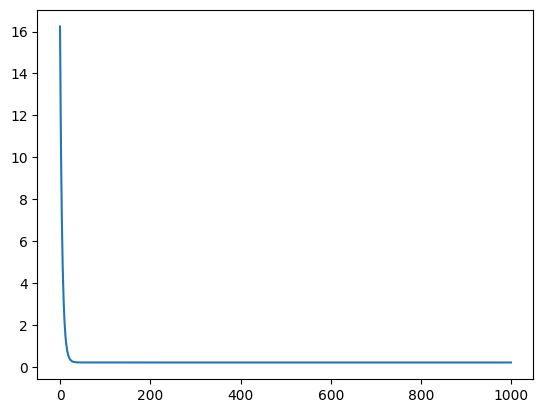

In [38]:
plt.plot(train_losses)

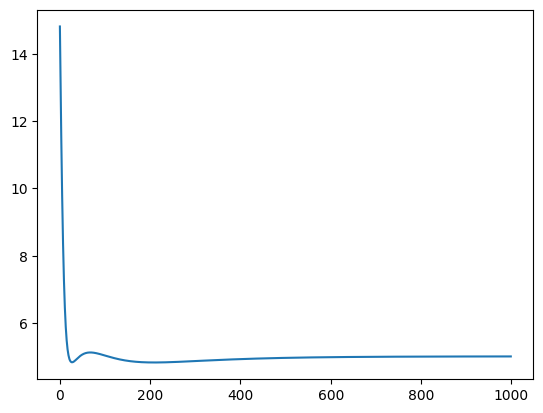

In [39]:
plt.plot(val_losses)

# alpha = 0.01

In [40]:
w=np.zeros((12,))
print(w)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [41]:
train_losses_2,val_losses_2=linear_regression(X_train_scaled,y_train,X_val,y_val,w,0.01,3000)

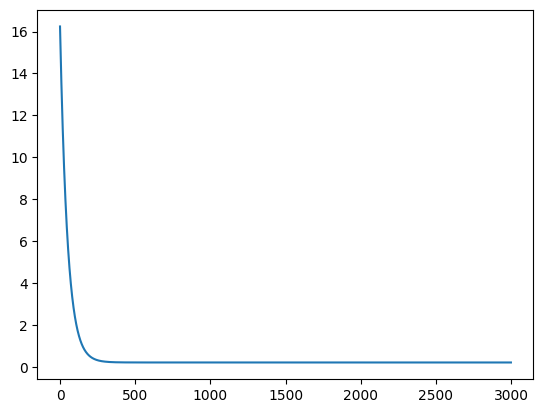

In [42]:
plt.plot(train_losses_2)

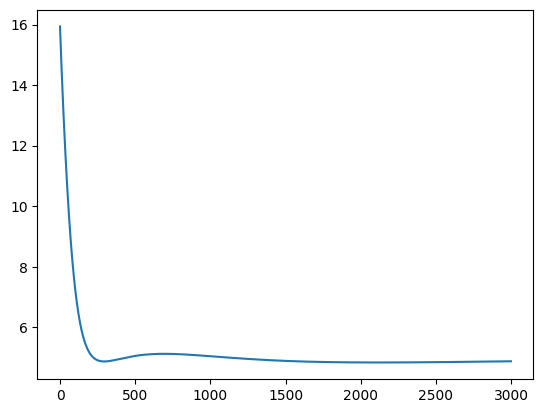

In [43]:
plt.plot(val_losses_2)

# alpha = 0.001

In [44]:
w=np.zeros((12,))
print(w)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [45]:
train_losses_3,val_losses_3=linear_regression(X_train_scaled,y_train,X_val,y_val,w,0.001,8000)

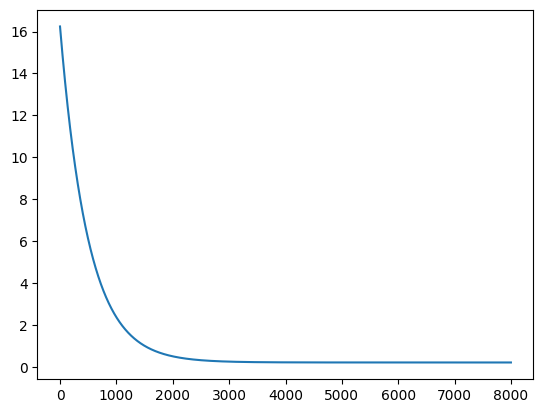

In [46]:
plt.plot(train_losses_3)

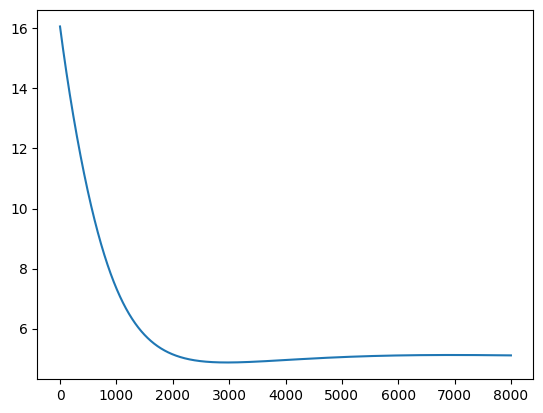

In [47]:
plt.plot(val_losses_3)

In [48]:
X_test.shape

(320, 12)

In [49]:
X_test_scaled=normalize_matrix(X_test)

y_testpred=np.dot(X_test_scaled,w)
print(X_test_scaled.shape)
print(w.shape)
y_testpred.shape

Original Matrix:
[[ 1.    7.9   0.72 ...  3.4   0.53  9.5 ]
 [ 1.   10.6   0.31 ...  3.26  0.86 10.7 ]
 [ 1.    7.3   0.39 ...  3.41  0.54  9.4 ]
 ...
 [ 1.   10.    0.35 ...  3.23  0.52 12.  ]
 [ 1.    9.9   0.35 ...  3.21  0.5   9.5 ]
 [ 1.    7.4   0.66 ...  3.51  0.56  9.4 ]]

Normalized Matrix:
[[ 1.         -0.25560867  1.02373839 ...  0.5778992  -0.82038121
  -0.80689022]
 [ 1.          1.19636957 -1.08398192 ... -0.30752775  1.42863893
   0.28546248]
 [ 1.         -0.5782705  -0.67271942 ...  0.64114398 -0.75222908
  -0.89791961]
 ...
 [ 1.          0.87370774 -0.87835067 ... -0.4972621  -0.88853333
   1.46884458]
 [ 1.          0.81993077 -0.87835067 ... -0.62375167 -1.02483758
  -0.80689022]
 [ 1.         -0.52449353  0.71529151 ...  1.27359181 -0.61592483
  -0.89791961]]
(320, 12)
(12,)


(320,)

In [50]:
X_test

array([[ 1.  ,  7.9 ,  0.72, ...,  3.4 ,  0.53,  9.5 ],
       [ 1.  , 10.6 ,  0.31, ...,  3.26,  0.86, 10.7 ],
       [ 1.  ,  7.3 ,  0.39, ...,  3.41,  0.54,  9.4 ],
       ...,
       [ 1.  , 10.  ,  0.35, ...,  3.23,  0.52, 12.  ],
       [ 1.  ,  9.9 ,  0.35, ...,  3.21,  0.5 ,  9.5 ],
       [ 1.  ,  7.4 ,  0.66, ...,  3.51,  0.56,  9.4 ]])

In [51]:
print(f"r_squared: {calculate_r_squared(y_test,y_testpred)}")

r_squared: 0.3991593477424942


In [52]:
print(f"rmse: {calculate_rmse(y_test,y_testpred)}")

rmse: 0.6643976588767766


In [53]:
print(f"mse:{calculate_rmse(y_test,y_testpred)**2}")

mse:0.4414242491209416
